# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
#1. Read tic-tac-toe.csv into a dataframe:
import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-deep-learning\\your-code\\tic-tac-toe.csv")
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [2]:
#2. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [3]:
data.isna().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [4]:
data["class"].value_counts()

True     626
False    332
Name: class, dtype: int64

In [5]:
#3. Convert the categorical values to numeric in all columns. + 5. Normalize the input data:

data_dummies = pd.get_dummies(data, columns=['TL','TM','TR','ML','MM','MR','BL','BM','BR'])
data_dummies.head()

,class,TL_b,TL_o,TL_x,TM_b,TM_o,TM_x,TR_b,TR_o,TR_x,...,MR_x,BL_b,BL_o,BL_x,BM_b,BM_o,BM_x,BR_b,BR_o,BR_x
0,True,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,True,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,True,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,True,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,True,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [6]:
data_dummies['class'] = np.where(data_dummies['class'] == True, 1, 0)

#OR:
#data_dummies['class'] = data_dummies['class'].apply(lambda x : 1 if x == True else 0)

In [7]:
# 4. Separate the inputs and output:
inputs = data_dummies.drop(columns='class')
outputs = data_dummies['class']

In [8]:
data_dummies

,class,TL_b,TL_o,TL_x,TM_b,TM_o,TM_x,TR_b,TR_o,TR_x,...,MR_x,BL_b,BL_o,BL_x,BM_b,BM_o,BM_x,BR_b,BR_o,BR_x
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
954,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
955,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
956,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [9]:
#1. Split the training and test data:

import tensorflow as tf

mnist = tf.keras.datasets.mnist #

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [10]:
#2. Create a Sequential model:
model = tf.keras.models.Sequential()

In [11]:
#3. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers.
#Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [12]:
#4. Compile the model using adam as the optimizer and sparse_categorical_crossentropy as the loss function. For metrics, use accuracy for now.

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [13]:
#5.Fit the training data.

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8511 - accuracy: 0.8760
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2188 - accuracy: 0.9386
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1678 - accuracy: 0.9522


In [14]:
#6. Evaluate your neural network model with the test data.

val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.9561


In [15]:
#7. Save your model as tic-tac-toe.model.

model.save("tic-tac-toe.model")

INFO:tensorflow:Assets written to: tic-tac-toe.model\assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [16]:
# Load model:

new_model = tf.keras.models.load_model('tic-tac-toe.model')

In [17]:
#Make predictions:

predictions = new_model.predict([x_test])
print(predictions)

[[7.8070730e-16 1.0441314e-09 1.3847793e-07 ... 9.9999988e-01
  3.5572101e-14 4.7494495e-08]
 [2.9789999e-07 1.2908035e-05 9.9938726e-01 ... 8.4106969e-06
  5.4837442e-06 1.9768532e-08]
 [3.0709185e-10 9.9984086e-01 5.8131955e-05 ... 1.8982799e-06
  5.3805226e-05 8.9930960e-09]
 ...
 [3.7435651e-14 4.0480090e-09 1.6706869e-12 ... 4.7822550e-09
  1.4822677e-07 3.5135067e-06]
 [1.5346297e-11 1.5227756e-13 7.3581419e-11 ... 8.6902525e-12
  1.0937601e-09 2.0485447e-09]
 [1.2103893e-09 1.1368282e-12 1.9753125e-12 ... 2.3559422e-16
  3.7059709e-09 1.1214651e-14]]


7


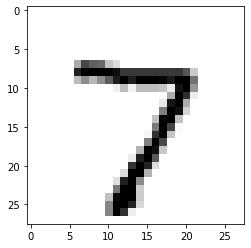

In [18]:
# Print the first element to check
import numpy as np

print(np.argmax(predictions[0]))

import matplotlib.pyplot as plt

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [19]:
#Test by adding more layers:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 3)

val_loss, val_acc = model.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1152 - accuracy: 0.6780
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9335
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9548


In [20]:
#Test by adjust the learning rate when you compile the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

opti = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

model.compile(optimizer = opti, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 3)

val_loss, val_acc = model.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9372 - accuracy: 0.8782
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2276 - accuracy: 0.9389
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.9567


In [21]:
#Test by adding more layers + adjust the learning rate when you compile the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

opti = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

model.compile(optimizer = opti, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 3)

val_loss, val_acc = model.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6499 - accuracy: 0.8668
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1977 - accuracy: 0.9443
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9591


In [22]:
#Test by adjust the number of epochs when you fit the training data to the model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4)

val_loss, val_acc = model.evaluate(x_test, y_test)

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9321 - accuracy: 0.8796
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2187 - accuracy: 0.9388
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1734 - accuracy: 0.9519
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.1592 - accuracy: 0.9560


In [23]:
#Test by adding more layers + adjust the learning rate when you compile the model + adjust the number of epochs when you fit the training data to the model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

opti = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

model.compile(optimizer = opti, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4)

val_loss, val_acc = model.evaluate(x_test, y_test)

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8160 - accuracy: 0.7878
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2500 - accuracy: 0.9342
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1671 - accuracy: 0.9547
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.1519 - accuracy: 0.9602


**Which approach(es) did you find helpful to improve your model performance?**

In [24]:
# In reality the best approach was when I add all (adding more layers, adjust the learning rate when you compile the model
# and adjust the number of epochs when you fit the training data to the model, that I got 96.02